``` Linear Function : ``` 

A <em> Linear function</em> is used to fit and predict a model from a given set of a datapoints.<br>
The Linear function would be : $$ f(x) = wx + b $$

<em>where</em> <br>
$x$ : Input<br>
$w$ : Weights<br>
$b$ : bias<br>



In [1]:
#Linear Regression model : f(xi) = wxi + b 
def linearFunction(weight,x_point,bias):
    ''' 
    args : Takes in the weight,xvalue,and bias of a dataset
    return : returns the model f(xi) = wxi + b
    '''
    return weight*x_point + bias

def compute_output(x_input,weight,bias,y_output):
    ''' 
    args : Takes in the x_input,w,bias,y_output
    return : returns the f(x) after computing for all x values
    '''
    for i in x_input:
         f_x = linearFunction(weight,i,bias)
         y_output.append(f_x)
    return y_output

In [2]:

# weights and bias are are passed over the functions in the following cells
w1 = 1
bias = 0

x_input = [i for i in range(1,4)]
y_output = []

y_output = compute_output(x_input,w1,bias,y_output)
print(x_input,y_output,sep="\n")

[1, 2, 3]
[1, 2, 3]


In [3]:
w2 = 0.5

y2_output = []
y2_output = compute_output(x_input,w2,bias,y2_output)

print(x_input,y2_output,sep="\n")

[1, 2, 3]
[0.5, 1.0, 1.5]


```Cost Function Computation:```

For this Linear Model $f(x_i) = wx_i + b$,
The <b>Cost Function</b> is calculated as $$ J(w,b) = (1/2m) \Sigma_{i=1}^m [f(x_i) - y]^2$$ <br>
This is further expanded into : 
$$ J(w,b) = (1/2m) \Sigma_{i=1}^m [(wx_i + b) - y]^2$$

 
<em>Notations</em>: <br>
$x_i$ : Inputs<br>
$y$ : Target Output<br>
$w$ : Weights<br>
$b$ : bias<br>
$m$ : size of training data<br>




In [4]:

def compute_cost(y_output,target_output):
    m = len(y_output)
    cost = 0
    
    for i in range(len(y_output)):
        cost +=  (y_output[i] - target_output[i]) ** 2
    
    return (1/(2 * m)) * cost 

In [5]:
#compute Cost 

costoutput = []
costoutput.append(compute_cost(y2_output,y_output))
# print(compute_cost(y2_output,y_output))
costoutput.append(compute_cost(y_output,y_output))

w3 = 1.5
b2 = 1 

y3_output = []
y3_output = compute_output(x_input,w3,b2,y3_output)

print(y3_output)

costoutput.append(compute_cost(y3_output,y_output))

print(costoutput)

[2.5, 4.0, 5.5]
[0.5833333333333333, 0.0, 2.083333333333333]


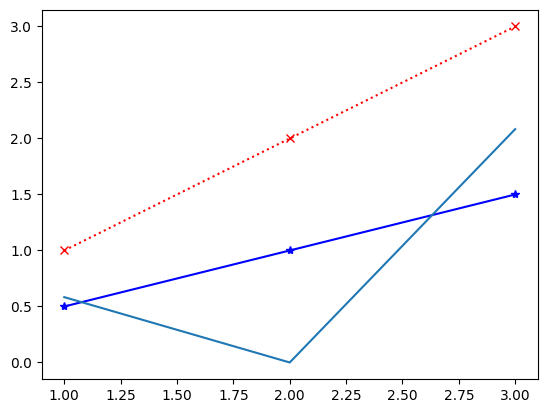

In [6]:
#Here, the datapoints are plotted from the computed x_input and y_output arrays
#Matplotlib is used to plot and visualise the model 
import matplotlib.pyplot as plt

xpoints = x_input
ypoints = y_output

y2points = y2_output
plt.plot(xpoints,ypoints,'x:r')
plt.plot(xpoints,y2points,'*-b')
plt.plot(xpoints,costoutput)
plt.show()


### Gradient Descent :

Gradient Descent Algorithm is a cost minimizing algorithm which reduces the value of weight and bias by succesive iterations. <br>
The Gradient Descent Algorithm would be : <br>
$$ w = w - {\alpha} ({\partial / \partial w})[J(_w,_b)]  \\
b = b - {\alpha} ({\partial / \partial b})[J(_w,_b)]
$$

After computing the partial derivatives, the Values would be: <br>
$$
          w = w - {\alpha} [(1/m) \Sigma_{i=1}^m (wx_i + b) - y](x_i) \\
          b = b - {\alpha} [(1/m) \Sigma_{i=1}^m (wx_i + b) - y]
$$


In [7]:
# Load our data Set
import numpy as np
import math
x_train = np.array([1,2],dtype=float) #features 
y_train = np.array([300,500],dtype=float) # target value


In [8]:
#Linear Regression model : f(xi) = wxi + b 
def linearFunction(weight,x_point,bias):
    ''' 
    args : Takes in the weight,xvalue,and bias of a dataset
    return : returns the model f(xi) = wxi + b
    '''
    return weight*x_point + bias

def compute_output(x_input,weight,bias):
    ''' 
    args : Takes in the x_input,w,bias,y_output
    return : returns the f(x) after computing for all x values
    '''
    y_output = []
    for i in x_input:
         f_x = linearFunction(weight,i,bias)
         y_output.append(f_x)
    return y_output

In [9]:
def costFunction(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [10]:
y_output = np.array([])
y_output = compute_output(x_train,1,0)
print(y_output)
cost_output = compute_cost(y_output,y_train)
print(cost_output)

[1.0, 2.0]
84351.25


In [11]:
#compute Gradient 
def compute_gradient(x_train,y_train,w,b):
    """
    Computes the gradient for linear regression 
    Args:
      x_train(ndarray (m,)): Data, m examples 
      y_train(ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
    """
    dj_dw = 0 
    dj_db = 0
    m = x_train.shape[0]

    for i in range(m):
        f_wb = linearFunction(w,x_train[i],b)
        dj_dw_i = (f_wb - y_train[i]) * x_train[i]
        dj_db_i = (f_wb - y_train[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw /= m
    dj_db /= m 

    return dj_dw,dj_db


        


In [12]:
def gradient_descent(x_train,y_train,w_in,b_in,alpha,num_iters,compute_cost,compute_gradient):
      """
      Performs gradient descent to fit w,b. Updates w,b by taking 
      num_iters gradient steps with learning rate alpha
    
      Args:
      x_train (ndarray (m,))  : Data, m examples 
      y_train (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
        Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """

      J_history = []
      p_history = []

      b = b_in
      w = w_in

      for i in range(num_iters):
        #Calculate the gradient and update the params using gradient function
        dj_dw,dj_db = compute_gradient(x_train,y_train,w,b)

        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append(costFunction(x_train, y_train, w , b))
            p_history.append([w,b])
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
      
      return w,b,J_history,p_history



In [13]:
w_in = 0
b_in = 0
tmp_alpha = 1.0e-2
iterations = 1000000
# print(compute_gradient(x_train,y_train,w_in,b_in))
w_fin,b_fin,J_history,p_history = gradient_descent(x_train,y_train,w_in,b_in,tmp_alpha,iterations,compute_cost,compute_gradient)
print(f"The final weight : {w_fin:8.4f}")
print(f"The final bias : {b_fin:8.4f}")


Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 100000: Cost 1.26e-23  dj_dw: -1.421e-12, dj_db:  7.105e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 200000: Cost 1.26e-23  dj_dw: -1.421e-12, dj_db:  7.105e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 300000: Cost 1.26e-23  dj_dw: -1.421e-12, dj_db:  7.105e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 400000: Cost 1.26e-23  dj_dw: -1.421e-12, dj_db:  7.105e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 500000: Cost 1.26e-23  dj_dw: -1.421e-12, dj_db:  7.105e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 600000: Cost 1.26e-23  dj_dw: -1.421e-12, dj_db:  7.105e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 700000: Cost 1.26e-23  dj_dw: -1.421e-12, dj_db:  7.105e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 800000: Cost 1.26e-23  dj_dw: -1.421e-12, dj_db:  7.105e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 900000: Cost 1.26e-23  dj_dw: -1.421e-12, dj_db:  7.105e-13   w:  2.000e+0

In [14]:
x = 100000000000.000000
print(f"{x:5.4f}")
x = 100000000000.000000
print(format(x, "5.4f"))


100000000000.0000
100000000000.0000
